#  **<font size=6><center>PROJETO DE ESTATÍSTICA APLICADA</center></font>** 

### <font color=green size=5>Roteiro do projeto </font>
<br>
1. Escolher uma base de dados que você quiser trabalhar ou tambem pode usar os seguintes links para escolher uma base de dados pública (tem dados de diferentes areas) <a href ='https://ces.ibge.gov.br/base-de-dados/links-base-de-dados.html'> IBGE </a> ou <a href='https://opendatasus.saude.gov.br/dataset'> DATA SUS</a>.  <br>
2. Explicar o contexto dos dados: Origem, historia dos dados, o site que os disponibiliza, etc… <br>
3. Estabelecer as perguntas ou hipóteses que você quer responder e os modelos estatísticos que pretende usar para dar respostas aos questionamentos <br>
4. Fazer uma exploração dos dados: Tendência central, medidas de dispersão e visualizações que apoiem o processo de descrição dos dados. <br>
5. Fazer inferência estatística usando testes de hipóteses paramétricos ou não paramétricos dependendo se amostra provém de uma distribuição conhecida (Use um teste de aderência para saber se uma amostra provém de uma distribuição específica).<br>
6. Fazer um modelo de regressão entre duas variáveis com correlação linear significativa (lembre-se de validar o modelo com analise de residuos, R^2 , etc..). <br>
7. Explicar as conclusões do trabalho.<br> 

### <font color=green size=4>Grupo: </font>
<br>
<strong> 
    <ul>
        <li>Daniel Macedo</li>
        <li>Tasso Oliveira</li>
        <li>Vinicius Dantas</li>
     </ul>
</strong>
<br>
<strong> Professor: Adiel Filho <br> Monitor: Miguel Ortiz </strong>

<font color=green size=4> <b>Fonte de dados:  </b></font> <a href='https://www.kaggle.com/mathchi/diabetes-data-set'> Kaggle - Diabetes Dataset </a> <br>
<br>
<font color=green size=3> <b>Origem / História dos dados</b> </font> <br>
<br>
Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de herança indígena Pima.
<br>
<ul>
<li>Número de instâncias: 768</li>
<li>Número de atributos: 8 mais classe</li>
<li>Para cada atributo: (todos com valor numérico)</li>
</ul>
<ol>    
<li>Número de vezes que engravidou</li>
<li>Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose</li>
<li>Pressão arterial diastólica (mm Hg)</li>
<li>Espessura da dobra cutânea do tríceps (mm)</li>
<li>Insulina sérica de 2 horas (mu U / ml)</li>
<li>Índice de massa corporal (peso em kg / (altura em m) ^ 2)</li>
<li>Função de pedigree de diabetes</li>
<li>Anos de idade</li>
<li>Variável de classe (0 ou 1)</li>
</ol>
Valores de atributo ausentes: Sim <br>
Distribuição de classe: (valor de classe 1 é interpretado como "teste positivo para
diabetes") 

<font color=green size=3> <b>Hipóteses</b> </font> <br> 
<ul>
    <li>Quais variáveis mais se correlacionam com a variável alvo (Outcome)?</li>
</ul>

#### Configurações

In [2]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19044)

Matrix products: default

locale:
[1] LC_COLLATE=Portuguese_Brazil.1252  LC_CTYPE=Portuguese_Brazil.1252   
[3] LC_MONETARY=Portuguese_Brazil.1252 LC_NUMERIC=C                      
[5] LC_TIME=Portuguese_Brazil.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_0.5.0     digest_0.6.29   utf8_1.2.2      crayon_1.4.2   
 [5] IRdisplay_1.0   repr_1.1.3      lifecycle_1.0.1 jsonlite_1.7.2 
 [9] evaluate_0.14   pillar_1.6.4    rlang_0.4.12    uuid_1.0-3     
[13] vctrs_0.3.8     ellipsis_0.3.2  IRkernel_1.2    tools_4.1.1    
[17] fastmap_1.1.0   compiler_4.1.1  base64enc_0.1-3 pbdZMQ_0.3-6   
[21] htmltools_0.5.2

In [3]:
if(!require(pacman)) install.packages("pacman")
library(pacman)
pacman::p_load(dplyr, ggplot2, car, rstatix, tidyverse, nortest, lmtest, ggpubr)
#install.packages("nortest")
#install.packages("rstatix")
#install.packages("tidyverse")

Carregando pacotes exigidos: pacman

Warning message:
"package 'pacman' was built under R version 4.1.2"


In [4]:
formatos <-     theme(
        plot.title = element_text(size = 14, hjust = 0.5),
        axis.title.y = element_text(size = 12, vjust = +0.2),
        axis.title.x = element_text(size = 12, vjust = -0.2),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10)
    )

In [5]:
# configuração para o tamnanho dos plots
options(repr.plot.width = 8, repr.plot.height = 5) 

#retirando notação cientifica
options(scipen=999) 

----

<font color=green size=5> <b>1 - Primeiros passos</b> </font> <br> 

#### Importando o dataset

In [6]:
dados <- read.csv("diabetes.csv")

#### Visualizando algumas sobre os dados

In [7]:
head(dados, 10)
sprintf("Quantidade de linhas: %d", nrow(dados))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31.0,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


[1] "Quantidade de linhas: 768"

<font color=green size=4> <b>1.1 - Tendência Central das Variáveis </b> </font> 

In [8]:
summary(dados)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

#### Média, Mediana e Moda

In [9]:
Moda <- function(x){
  freq <- table(x)
  return(names(freq)[freq == max(freq)])
}

In [10]:
sprintf("Media, Mediana e Moda da variavel Pregnancies: %.2f || %.2f || %s", mean(dados$Pregnancies), median(dados$Pregnancies), Moda(dados$Pregnancies))

[1] "Media, Mediana e Moda da variavel Pregnancies: 3.85 || 3.00 || 1"

In [11]:
sprintf("Media, Mediana e Moda da variavel SkinThickness: %.2f || %.2f || %s", mean(dados$SkinThickness), median(dados$SkinThickness), Moda(dados$SkinThickness))

[1] "Media, Mediana e Moda da variavel SkinThickness: 20.54 || 23.00 || 0"

In [12]:
sprintf("Media, Mediana e Moda da variavel BMI: %.2f || %.2f || %s", mean(dados$BMI), median(dados$BMI), Moda(dados$BMI))

[1] "Media, Mediana e Moda da variavel BMI: 31.99 || 32.00 || 32"

<font color=green size=4> <b>1.2 - Medidas de Dispersão </b> </font> 

#### Amplitude

In [13]:
max(dados$Pregnancies) - min(dados$Pregnancies)

[1] 17

#### Desvio Médio Absoluto

In [14]:
media_preg <- mean(dados$Pregnancies)
desv <- dados$Pregnancies - media_preg
desv_absoluto <- abs(desv)
mean(desv_absoluto)

[1] 2.77162

#### Variância 

In [15]:
var(dados$Pregnancies)
var(dados$SkinThickness)
var(dados$BMI)

[1] 11.35406

[1] 254.4732

[1] 62.15998

#### Desvio Padrão

In [16]:
sd(dados$Pregnancies)
sd(dados$SkinThickness)
sd(dados$BMI)

[1] 3.369578

[1] 15.95222

[1] 7.88416

----

<font color=green size=5> <b>2 - Visualizando os dados </b> </font> 

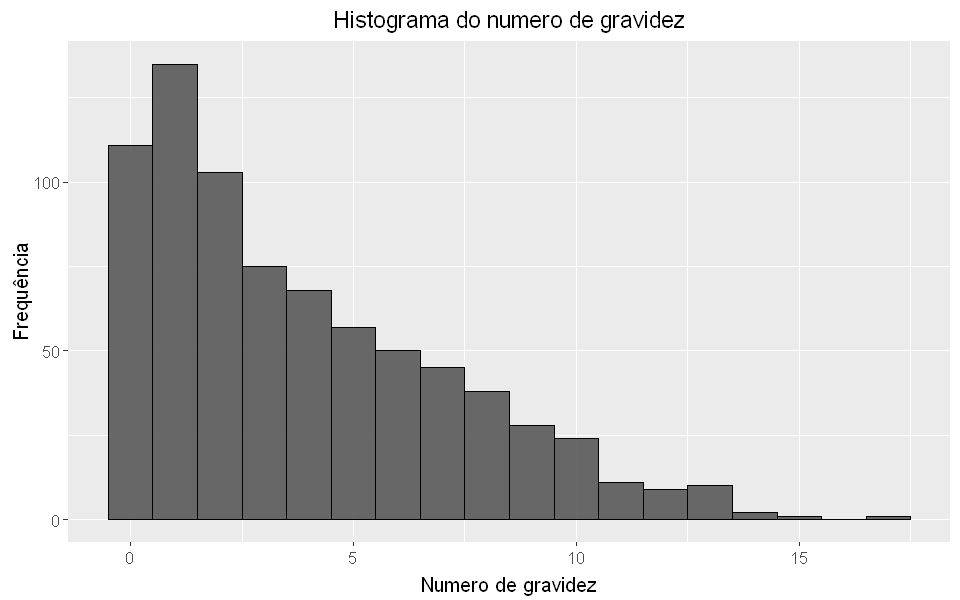

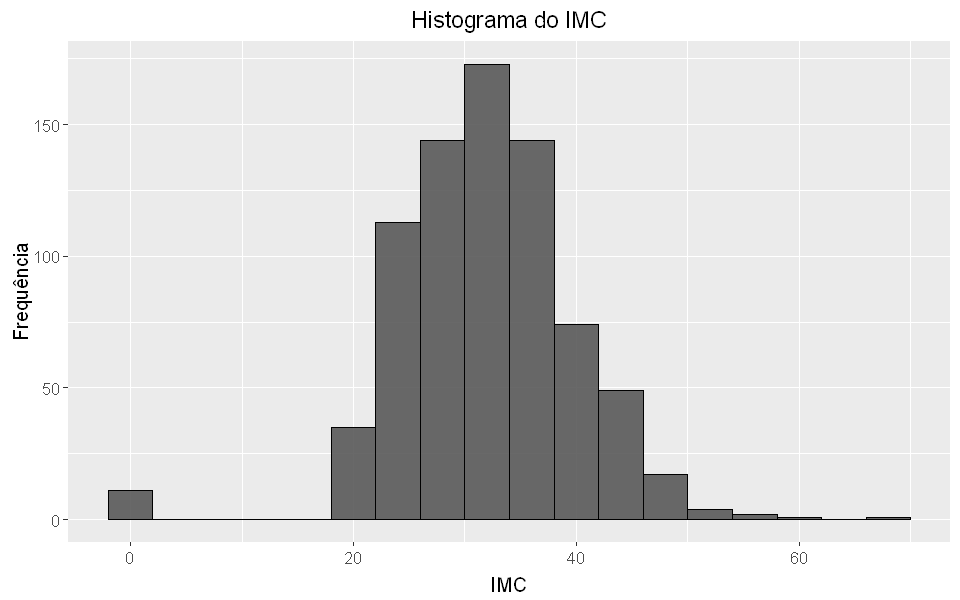

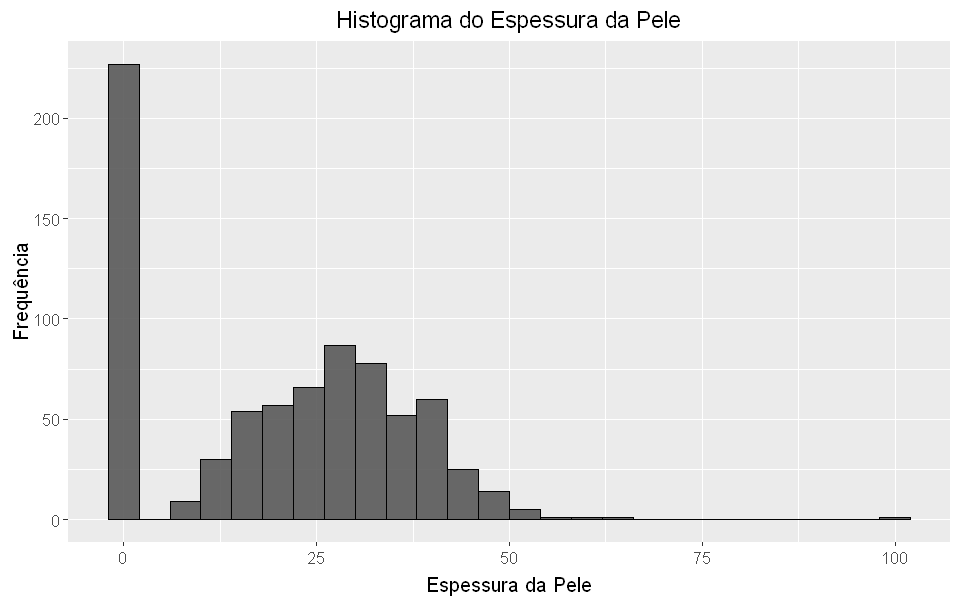

In [17]:
ggplot(dados, aes(x = Pregnancies)) + 
    geom_histogram(binwidth = 1, color = "black", alpha = 0.9) + 
    ylab("Frequência") + 
    xlab("Numero de gravidez") + 
    ggtitle('Histograma do numero de gravidez') +
    formatos

ggplot(dados, aes(x = BMI)) + 
    geom_histogram(binwidth = 4, color = "black", alpha = 0.9) + 
    ylab("Frequência") + 
    xlab("IMC") + 
    ggtitle('Histograma do IMC') +
    formatos

ggplot(dados, aes(x = SkinThickness)) + 
    geom_histogram(binwidth = 4, color = "black", alpha = 0.9) + 
    ylab("Frequência") + 
    xlab("Espessura da Pele") + 
    ggtitle('Histograma do Espessura da Pele') +
    formatos



<font size=2> Observando os histogramas das variáveis: Numero de Gravidez (Pregnancies), BMI (IMC) e SkinTickness (Espessura da Pele (nesse caso)) podemos perceber que essa ultima variável apresenta muitos valores iguais a 0. Além disso, a partir da observação das estatistica descritivas há valores 0 para as variaveis Insulina e Pressão Sanguínea. As linhas com esses valores serão <b>removidas</b>, mas não para Pregnancies, pois na coleta dos dados a pacientes pode não ter engravidado nenhuma vez.</font>

----

<font color=red size=4> <b>Trabalhando com um novo conjunto </b> </font> 

In [18]:
dados_limpos <- dados[(dados$SkinThickness > 0 & dados$BMI > 0 & dados$Glucose > 0 & dados$BloodPressure > 0 & dados$Insulin),]

In [19]:
nrow(dados_limpos)

[1] 392

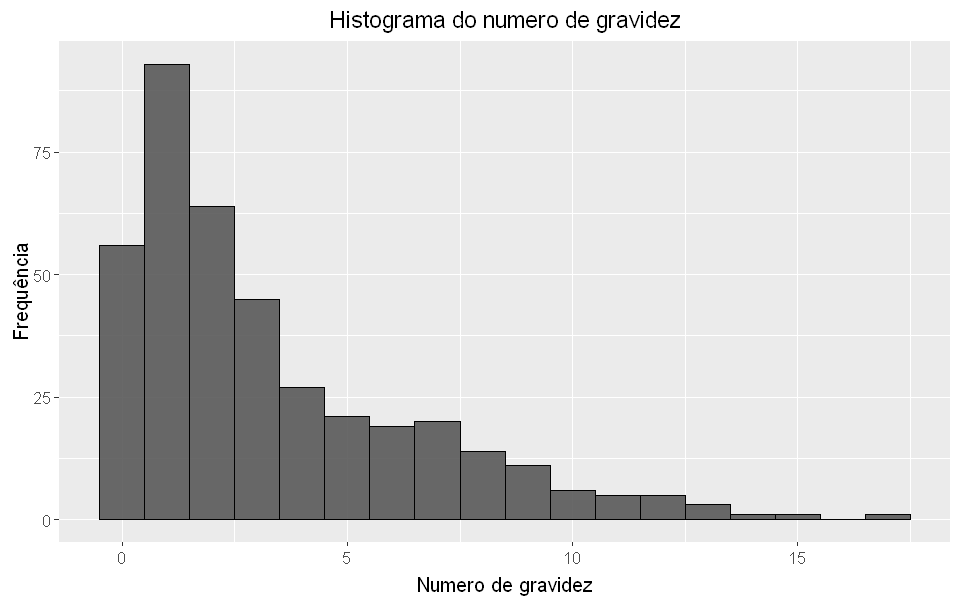

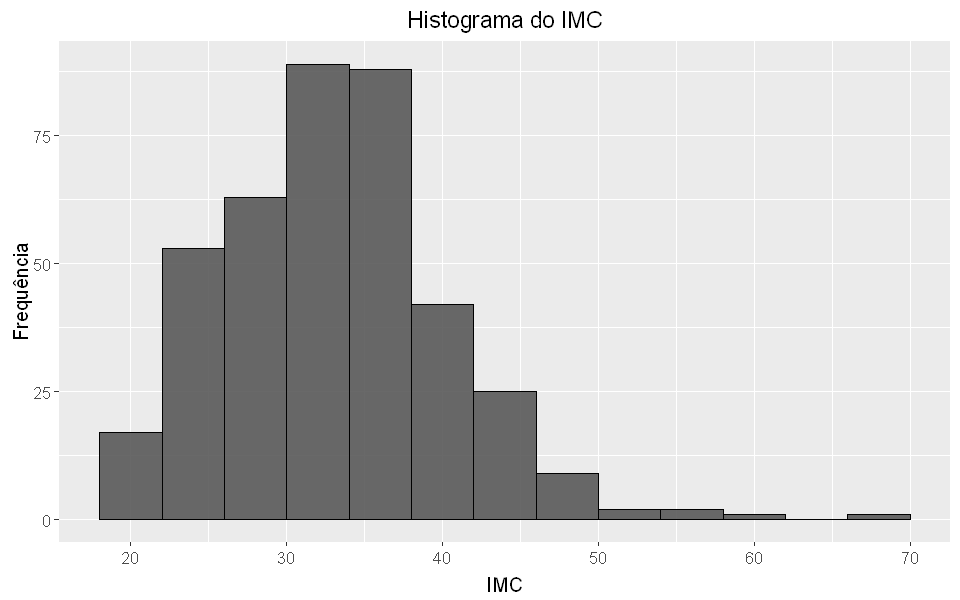

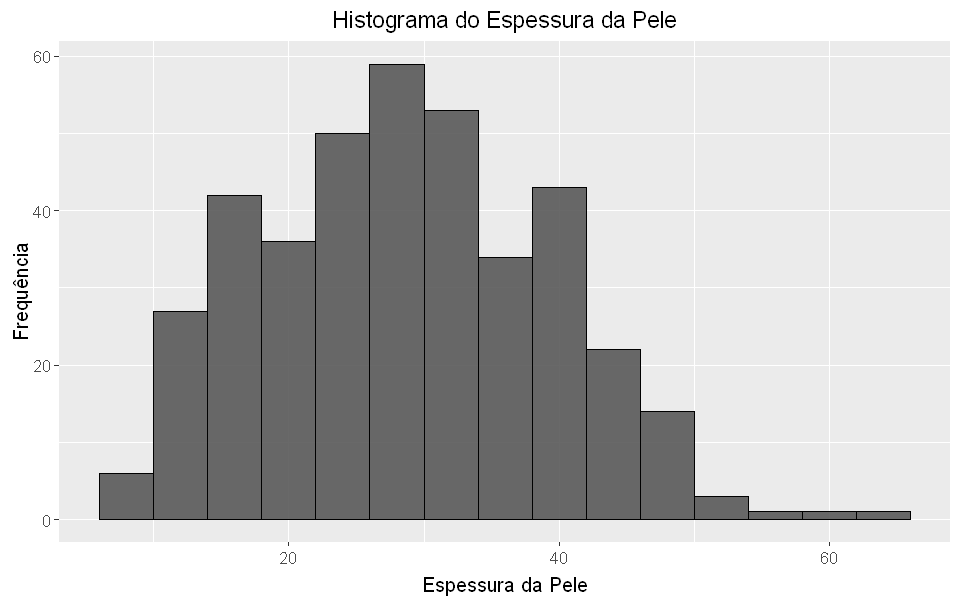

In [20]:
ggplot(dados_limpos, aes(x = Pregnancies)) + 
    geom_histogram(binwidth = 1, color = "black", alpha = 0.9) + 
    ylab("Frequência") + 
    xlab("Numero de gravidez") + 
    ggtitle('Histograma do numero de gravidez') +
    formatos

ggplot(dados_limpos, aes(x = BMI)) + 
    geom_histogram(binwidth = 4, color = "black", alpha = 0.9) + 
    ylab("Frequência") + 
    xlab("IMC") + 
    ggtitle('Histograma do IMC') +
    formatos

ggplot(dados_limpos, aes(x = SkinThickness)) + 
    geom_histogram(binwidth = 4, color = "black", alpha = 0.9) + 
    ylab("Frequência") + 
    xlab("Espessura da Pele") + 
    ggtitle('Histograma do Espessura da Pele') +
    formatos

Vamos observar possíveis Outliers em algumas das variáveis do conjunto.

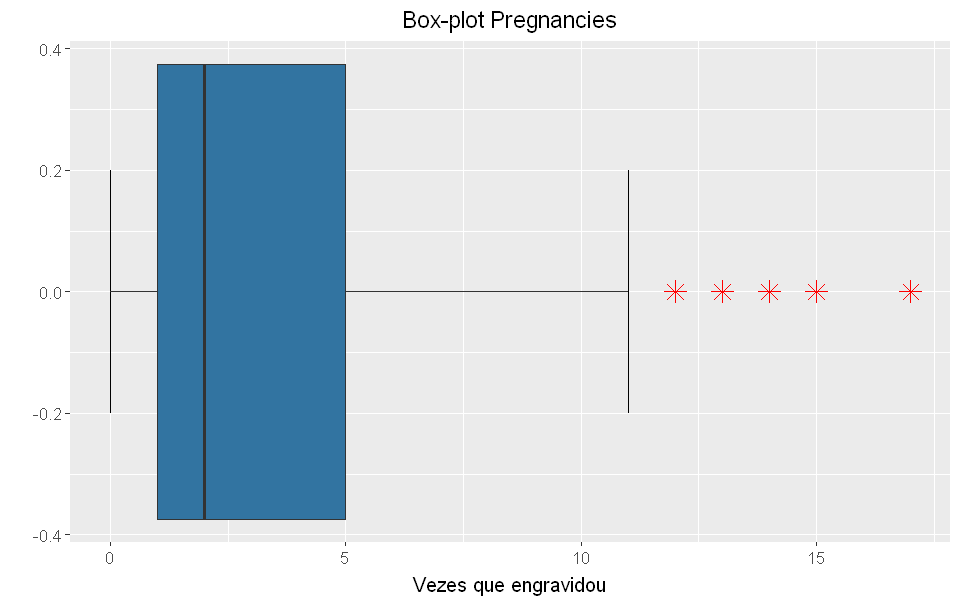

In [21]:
ggplot(data = dados_limpos, aes(x = , y = Pregnancies)) + 
    stat_boxplot(geom ='errorbar', width = 0.4) + 
    geom_boxplot(fill = '#3274A1', outlier.colour="red", outlier.shape=8,
                outlier.size=4) + 
    coord_flip() +
    ylab("Vezes que engravidou") + 
    xlab("") + 
    ggtitle('Box-plot Pregnancies') +
    formatos

In [22]:
dados_limpos[dados_limpos$Pregnancies > 11, ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
29,13,145,82,19,110,22.2,0.245,57,0
89,15,136,70,32,110,37.1,0.153,43,1
160,17,163,72,41,114,40.9,0.817,47,1
216,12,151,70,40,271,41.8,0.742,38,1
255,12,92,62,7,258,27.6,0.926,44,1
299,14,100,78,25,184,36.6,0.412,46,1
324,13,152,90,33,29,26.8,0.731,43,1
359,12,88,74,40,54,35.3,0.378,48,0
376,12,140,82,43,325,39.2,0.528,58,1


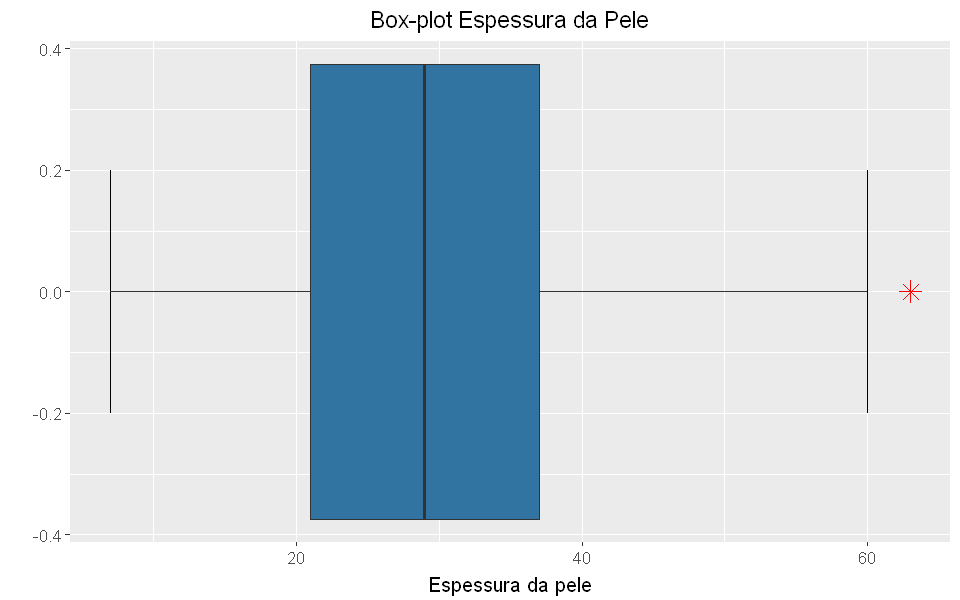

In [23]:
ggplot(data = dados_limpos, aes(x = , y = SkinThickness)) + 
    stat_boxplot(geom ='errorbar', width = 0.4) + 
    geom_boxplot(fill = '#3274A1', outlier.colour="red", outlier.shape=8,
                outlier.size=4) + 
    coord_flip() +
    ylab("Espessura da pele") + 
    xlab("") + 
    ggtitle('Box-plot Espessura da Pele') +
    formatos

In [24]:
dados_limpos[dados_limpos$SkinThickness >= 60, ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
58,0,100,88,60,110,46.8,0.962,31,0
446,0,180,78,63,14,59.4,2.420,25,1


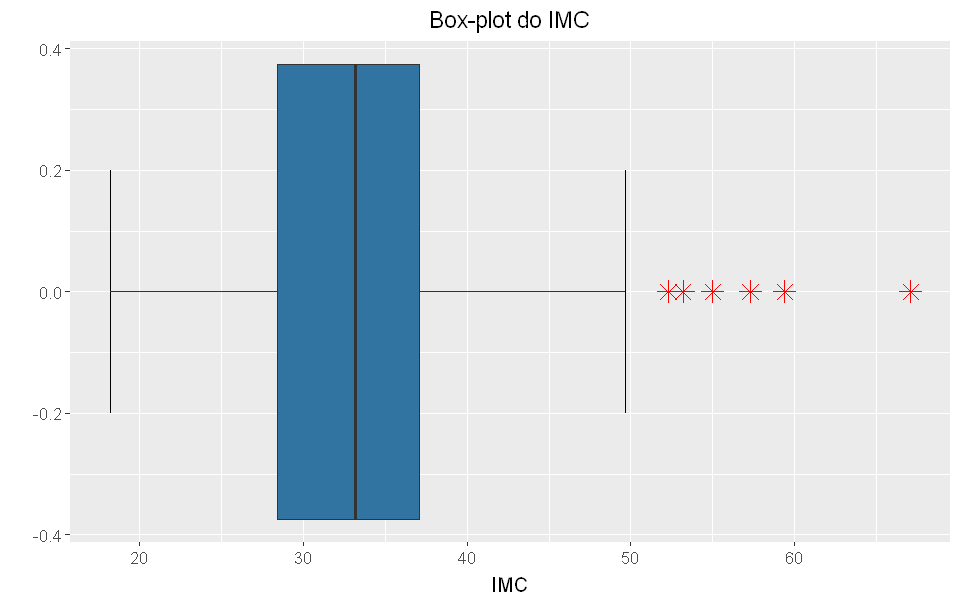

In [25]:
ggplot(data = dados_limpos, aes(x = , y = BMI)) + 
    stat_boxplot(geom ='errorbar', width = 0.4) + 
    geom_boxplot(fill = '#3274A1', outlier.colour="red", outlier.shape=8,
                outlier.size=4) + 
    coord_flip() +
    ylab("IMC") + 
    xlab("") + 
    ggtitle('Box-plot do IMC') +
    formatos

In [26]:
dados_limpos[dados_limpos$BMI > 51, ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
121,0,162,76,56,100,53.2,0.759,25,1
126,1,88,30,42,99,55.0,0.496,26,1
178,0,129,110,46,130,67.1,0.319,26,1
248,0,165,90,33,680,52.3,0.427,23,0
446,0,180,78,63,14,59.4,2.420,25,1
674,3,123,100,35,240,57.3,0.880,22,0


Ainda que seja possível identificar valores considerados Outliers, nesses casos não seria interessante remover esses dados. Pois é possível que esses valores se apresentem numa população, como IMC acima de 35 para pessoas Super Obsesas e mulheres que apresentem numeros de gravidez entre 10 e 17, por exemplo. 

<font color=green size=4> <b> 2.1 - Distribuição de Frequências </b> </font>

Definindo o numero de classes <br>
Classes personalizadas <br>

In [27]:
min(dados_limpos$BMI)
max(dados_limpos$BMI)

[1] 18.2

[1] 67.1

In [28]:
classes <- c(0, 18.5, 25, 30, 70)

In [29]:
labels <- c('Abaixo do Peso','Normal','Sobrepeso','Obesidade')

In [30]:
frequencia <- table(
  cut(
  x = dados_limpos$BMI,
  breaks = classes,
  labels = labels,
  include.lowest = TRUE
  )
)
frequencia


Abaixo do Peso         Normal      Sobrepeso      Obesidade 
             1             45             87            259 

In [31]:
percentual <- prop.table(frequencia) * 100
percentual


Abaixo do Peso         Normal      Sobrepeso      Obesidade 
      0.255102      11.479592      22.193878      66.071429 

In [32]:
dist_freq_imc <- cbind('Frequência' = frequencia, 'Porcentagem (%)' = percentual)
dist_freq_imc

,Frequência,Porcentagem (%)
Abaixo do Peso,1,0.255102
Normal,45,11.479592
Sobrepeso,87,22.193878
Obesidade,259,66.071429


In [33]:
bar_chart <- data.frame(dist_freq_imc)
bar_chart

,Frequência,Porcentagem....
,<dbl>,<dbl>
Abaixo do Peso,1,0.255102
Normal,45,11.479592
Sobrepeso,87,22.193878
Obesidade,259,66.071429


Warning message:
"Use of `bar_chart$Frequência` is discouraged. Use `Frequência` instead."


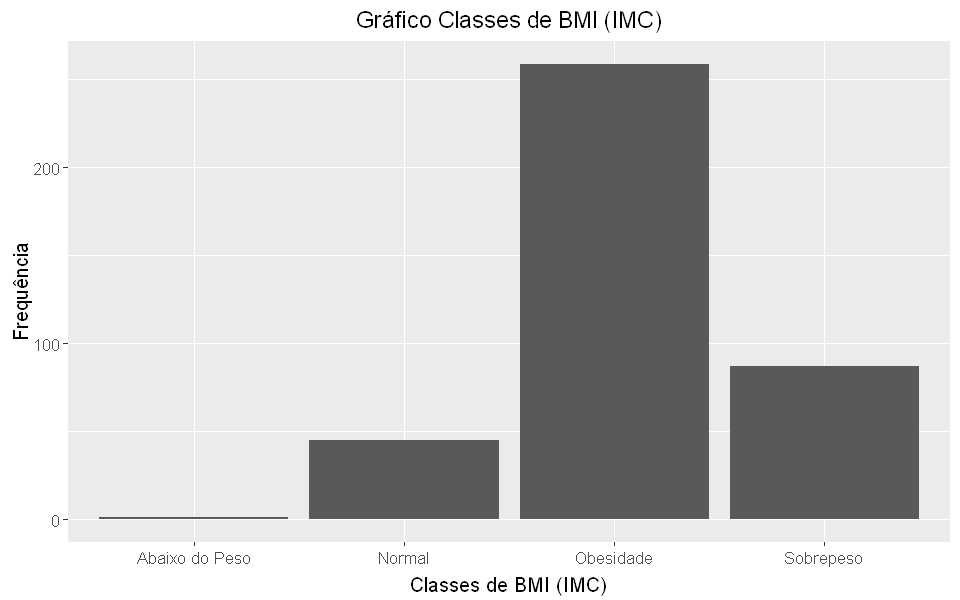

In [34]:
ggplot(bar_chart, aes(x = row.names(bar_chart), y = bar_chart$Frequência)) + 
    geom_bar(stat = "identity") + 
    ylab("Frequência") + 
    xlab("Classes de BMI (IMC)") + 
    ggtitle('Gráfico Classes de BMI (IMC)') +
    formatos

<font color=green size=4> <b>2.2 - Plotando alguns gráficos de regressão para visualizar possivel relação entre as variáveis</b> </font>

`geom_smooth()` using formula 'y ~ x'



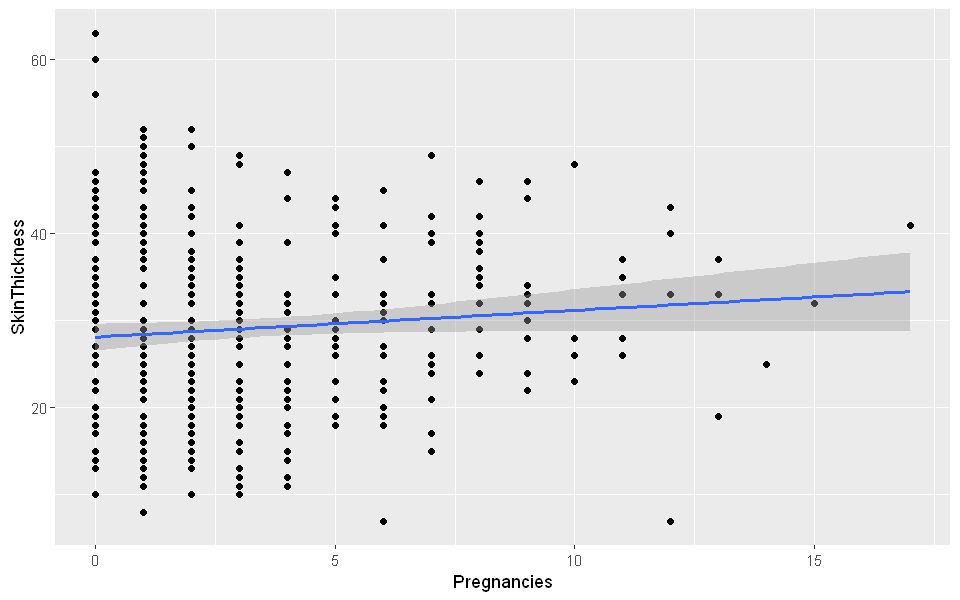

In [35]:
ggplot(data = dados_limpos, aes(x = Pregnancies, y = SkinThickness))+
  geom_point() + 
  geom_smooth(method = "lm")

`geom_smooth()` using formula 'y ~ x'



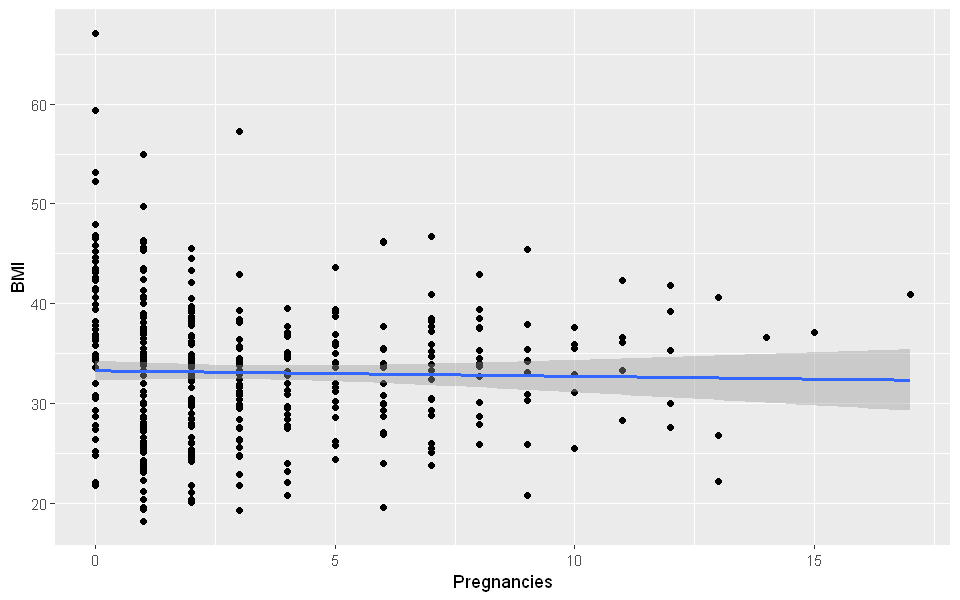

In [36]:
ggplot(data = dados_limpos, aes(x = Pregnancies, y = BMI))+
  geom_point() + 
  geom_smooth(method = "lm")

`geom_smooth()` using formula 'y ~ x'



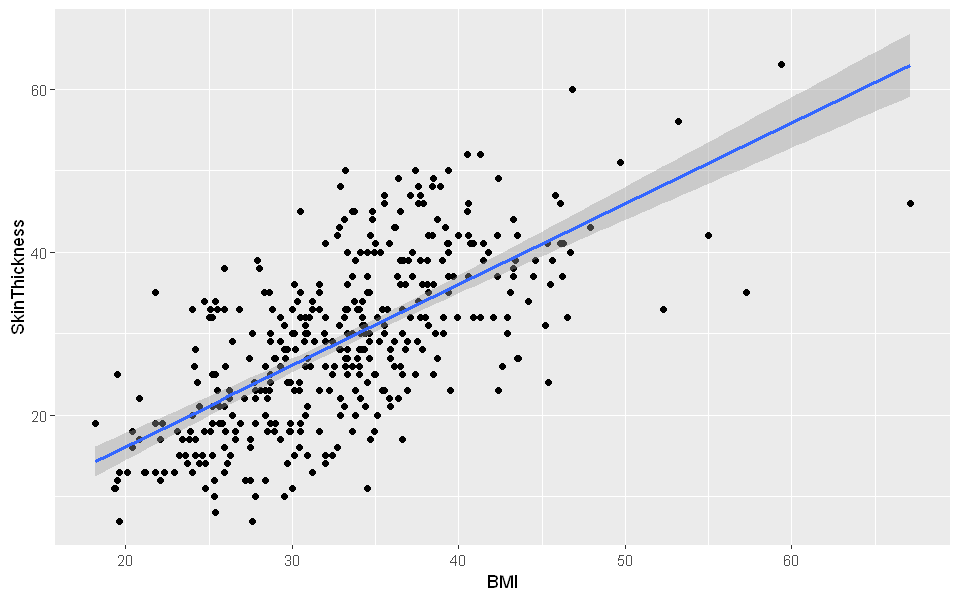

In [37]:
ggplot(data = dados_limpos, aes(x = BMI, y = SkinThickness))+
  geom_point() + 
  geom_smooth(method = "lm")

`geom_smooth()` using formula 'y ~ x'



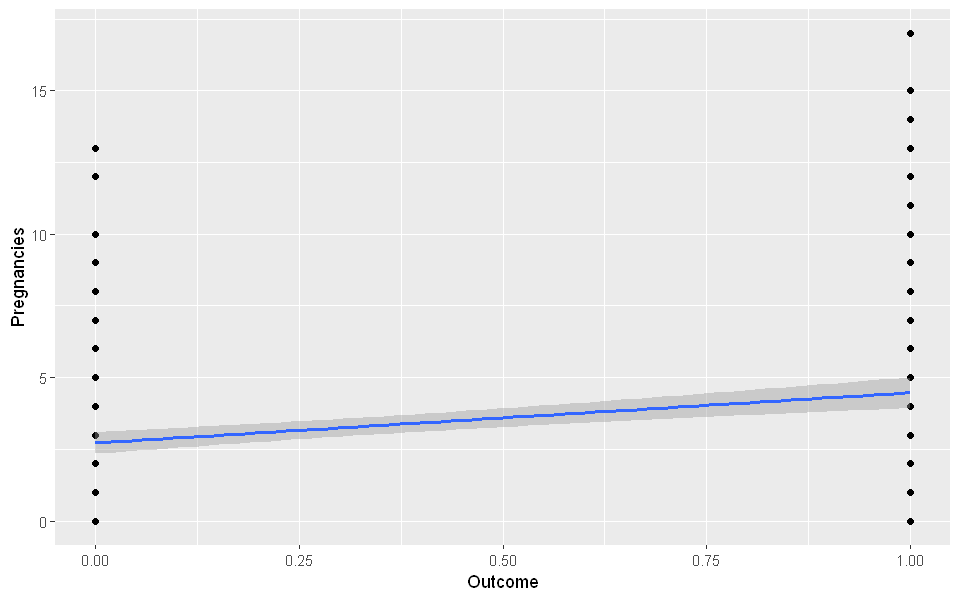

In [38]:
ggplot(data = dados_limpos, aes(x = Outcome, y = Pregnancies))+
  geom_point() + 
  geom_smooth(method = "lm")

Observações

----

<font color=green size=5> <b>3 - Normalidade dos dados </b> </font> 

Os histogramas plotados anteriormente, já nos mostra que os dados não apresentam uma distribuição normal. Mas vamos realizar alguns testes para verificar a distribuição das variáveis. 

#### Teste Lilliefors

In [39]:
lillie.test(dados_limpos$Pregnancies)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dados_limpos$Pregnancies
D = 0.20067, p-value < 0.00000000000000022


In [40]:
lillie.test(dados_limpos$BMI)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dados_limpos$BMI
D = 0.039093, p-value = 0.1541


In [41]:
lillie.test(dados_limpos$SkinThickness)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dados_limpos$SkinThickness
D = 0.054596, p-value = 0.006985


<font size=2> Com os valores de <i>p < 0,05</i> no teste, é possível concluir que as variáveis <b>Pregnancies e SkinThickness</b> não apresentam distribuição normal. Porém a variável <b>BMI</b> indica uma normal.  </font> 

---

<font color=green size=5> <b>4 - Testes de Hipóteses</b> </font> 

Os testes não paramétricos serão utilizados assumindo que as variáveis que se quer observar não apresentam distribuição normal. 

#### Correlação 

In [42]:
cor(dados_limpos[c('Pregnancies', 'SkinThickness', 'BMI', 'Outcome')], method="spearman")

,Pregnancies,SkinThickness,BMI,Outcome
Pregnancies,1.00000000,0.05475868,-0.06555144,0.2002345
SkinThickness,0.05475868,1.00000000,0.67439293,0.2601534
BMI,-0.06555144,0.67439293,1.00000000,0.2670772
Outcome,0.20023445,0.26015343,0.26707717,1.0000000


###### Biblioteca para discretizar o BMI

In [43]:
#library(dvmisc)
#codigo original em: https://rdrr.io/cran/dvmisc/src/R/bmi4.R
#Alterado as labels para esse caso
bmi4 <- function(x, labels = TRUE) {
  if (labels) {
    y <- cut(x, breaks = c(-Inf, 18.5, 25, 30, Inf), right = F,
             labels = c(1, 2, 3, 4))
  } else {
    y <- cut(x, breaks = c(-Inf, 18.5, 25, 30, Inf), right = F)
  }
  return(y)
}

In [44]:
#Criando uma nova coluna
dados_limpos$Cat.BMI<-bmi4(dados_limpos$BMI, labels = TRUE)

In [45]:
head(dados_limpos)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cat.BMI
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>
4,1,89,66,23,94,28.1,0.167,21,0,3
5,0,137,40,35,168,43.1,2.288,33,1,4
7,3,78,50,32,88,31.0,0.248,26,1,4
9,2,197,70,45,543,30.5,0.158,53,1,4
14,1,189,60,23,846,30.1,0.398,59,1,4
15,5,166,72,19,175,25.8,0.587,51,1,3


<font size=3 color=blue> <b> Passo 1 - Formular Hipóteses </b></font>
<ul>
<li>$H_0$ = Não há assossiação entre gravidez (Pregnancies) e IMC (BMI).</li>
<li>$H_1$ = Há assossiação entre gravidez (Pregnancies) e IMC (BMI). </li>
</ul>
<hr>
<ul>
<li>$H_0$ = Não há assossiação entre gravidez (Pregnancies) e Diabetes (Outcome).</li>
<li>$H_1$ = Há assossiação entre gravidez (Pregnancies) e Diabetes (Outcome). </li>
</ul>



<font size=3 color=blue> <b> Passo 2 - Definir o nível de significância </b></font><br>
<b> <ul> <li>Será considerada a significância de 1% (0,01) </li> </ul> </b>

In [46]:
sig <- 0.01

In [47]:
p <- c(0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.95, 0.99, 0.995)
df <- seq(1, 50, by = 1)
probabilidade <- c()
for(i in df){
    for(j in p){
        probabilidade <- c(probabilidade, round(qchisq(j, i, lower.tail = T), 4))
    }
}
tabela_chi_2 <- matrix(probabilidade, ncol=13, byrow=TRUE)
colnames(tabela_chi_2) <- format(p)
rownames(tabela_chi_2) <- format(df)
tabela_chi_2

,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382
4,0.2070,0.2971,0.4844,0.7107,1.0636,1.9226,3.3567,5.3853,7.7794,11.1433,9.4877,13.2767,14.8603
5,0.4117,0.5543,0.8312,1.1455,1.6103,2.6746,4.3515,6.6257,9.2364,12.8325,11.0705,15.0863,16.7496
6,0.6757,0.8721,1.2373,1.6354,2.2041,3.4546,5.3481,7.8408,10.6446,14.4494,12.5916,16.8119,18.5476
7,0.9893,1.2390,1.6899,2.1673,2.8331,4.2549,6.3458,9.0371,12.0170,16.0128,14.0671,18.4753,20.2777
8,1.3444,1.6465,2.1797,2.7326,3.4895,5.0706,7.3441,10.2189,13.3616,17.5345,15.5073,20.0902,21.9550
9,1.7349,2.0879,2.7004,3.3251,4.1682,5.8988,8.3428,11.3888,14.6837,19.0228,16.9190,21.6660,23.5894
10,2.1559,2.5582,3.2470,3.9403,4.8652,6.7372,9.3418,12.5489,15.9872,20.4832,18.3070,23.2093,25.1882


<font size=3 color=blue> <b> Passo 3 - Calcular Estatística Teste </b></font><br>

In [48]:
table_preg_bmi <- table(dados_limpos$Cat.BMI, dados_limpos$Pregnancies)
table_preg_bmi

   
     0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17
  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  2  3 17  9  5  4  1  2  1  0  1  0  0  0  1  0  0  0
  3  7 22 16 11  7  4  5  5  3  1  1  1  1  1  0  0  0
  4 46 53 39 29 16 16 12 14 11  9  5  4  4  1  1  1  1

In [49]:
table_preg_out <- table(dados_limpos$Outcome, dados_limpos$Pregnancies)
table_preg_out

   
     0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17
  0 37 73 52 26 21 13 15 10  3  5  3  0  2  2  0  0  0
  1 19 20 12 19  6  8  4 10 11  6  3  5  3  1  1  1  1

<font color=green size=3> <b> 4.1 - Teste do Qui-Quadrado ( $\chi^2$) </b> </font> 

#### Pregnancies e BMI

In [50]:
result_chi_test <- chisq.test(table_preg_bmi)
result_chi_test

Warning message in chisq.test(table_preg_bmi):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table_preg_bmi
X-squared = 27.914, df = 48, p-value = 0.991


#### Pregnancies e Outcome

In [51]:
result_chi_test_2 <- chisq.test(table_preg_out)
result_chi_test_2

Warning message in chisq.test(table_preg_out):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table_preg_out
X-squared = 52.693, df = 16, p-value = 0.000008463


<font size=3 color=blue> <b> Passo 4 - Aceitar ou rejeitar Hipótese Nula </b></font>

In [52]:
tabela_chi_2[47:49, ]

,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
47,25.7746,27.4158,29.9562,32.2676,35.0814,40.1492,46.335,53.1267,59.7743,67.8206,64.0011,72.4433,75.7041
48,26.5106,28.1770,30.7545,33.0981,35.9491,41.0794,47.335,54.1964,60.9066,69.0226,65.1708,73.6826,76.9688
49,27.2493,28.9406,31.5549,33.9303,36.8182,42.0104,48.335,55.2653,62.0375,70.2224,66.3386,74.9195,78.2307


In [53]:
tabela_chi_2[16:17, ]

,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
16,5.1422,5.8122,6.9077,7.9616,9.3122,11.9122,15.3385,19.3689,23.5418,28.8454,26.2962,31.9999,34.2672
17,5.6972,6.4078,7.5642,8.6718,10.0852,12.7919,16.3382,20.4887,24.7690,30.1910,27.5871,33.4087,35.7185


<font size=2 color=red> <b> Critério do valor crítico </b></font>
> ### Rejeitar $H_0$ se $\chi_{teste}^2 > \chi_{\alpha}^2$

In [54]:
result_chi_test$statistic > 73.6826

X-squared 
    FALSE

In [55]:
result_chi_test_2$statistic > 31.9999

X-squared 
     TRUE

### <font color='red'>Critério do valor $p$</font>
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$


In [96]:
if(result_chi_test$p.value <= sig){
    sprintf("Rejeita Hipótese Nula, |p-value: %f | ou seja, há dependência entre as variáveis.", result_chi_test$p.value)
}else{
    sprintf("Não rejeita Hippótese Nula | p-value: %f | ou seja, há independência entre as variáveis", result_chi_test$p.value)
}

[1] "Não rejeita Hippótese Nula | p-value: 0.990985 | ou seja, há independência entre as variáveis"

In [95]:
if(result_chi_test_2$p.value <= sig){
    sprintf("Rejeita Hipótese Nula, |p-value: %f | ou seja, há dependência entre as variáveis.", result_chi_test_2$p.value)
}else{
    sprintf("Não rejeita Hippótese Nula | p-value: %f | ou seja, há independência entre as variáveis", result_chi_test_2$p.value)
}

[1] "Rejeita Hipótese Nula, |p-value: 0.000008 | ou seja, há dependência entre as variáveis."

<font size=3 color=green> <b> Conclusão 1: com um nível de confiança de 99% há evidências para NÃO rejeitar a hipótese nula de que há independência entre as variáveis Pregnancies e BMI. </b></font> <br> <br>
<font size=3 color=green> <b> Conclusão 2: com um nível de confiança de 99% há evidências para rejeitar a hipótese nula de que há independência entre as variáveis Pregnancies e Outcome (Presença/Ausencia de Diabetes). </b></font>
<hr>

<font size=4 color=green> <b> ANOVA </b> </font>


$H_0$ = Não existe diferença entre a espessura da pele nos grupos de IMC <br>
$H_1$ = Há pelo menos um grupo diferente

In [58]:
anova1 <- aov(data=dados_limpos, SkinThickness ~as.factor(Cat.BMI))
summary(anova1) 

                    Df Sum Sq Mean Sq F value              Pr(>F)    
as.factor(Cat.BMI)   3  14259    4753   63.63 <0.0000000000000002 ***
Residuals          388  28983      75                                
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [59]:
#F tabelado
qf(0.99, df1=3, df2=388)

[1] 3.832457

In [60]:
TukeyHSD(anova1, conf.level = 0.99)

  Tukey multiple comparisons of means
    99% family-wise confidence level

Fit: aov(formula = SkinThickness ~ as.factor(Cat.BMI), data = dados_limpos)

$`as.factor(Cat.BMI)`
         diff         lwr      upr     p adj
2-1 -1.636364 -29.0259280 25.75320 0.9976696
3-1  3.647059 -23.5953163 30.88943 0.9751283
4-1 14.270992 -12.8641707 41.40616 0.3529629
3-2  5.283422   0.2534656 10.31338 0.0059680
4-2 15.907356  11.4948132 20.31990 0.0000000
4-3 10.623934   7.2432086 14.00466 0.0000000


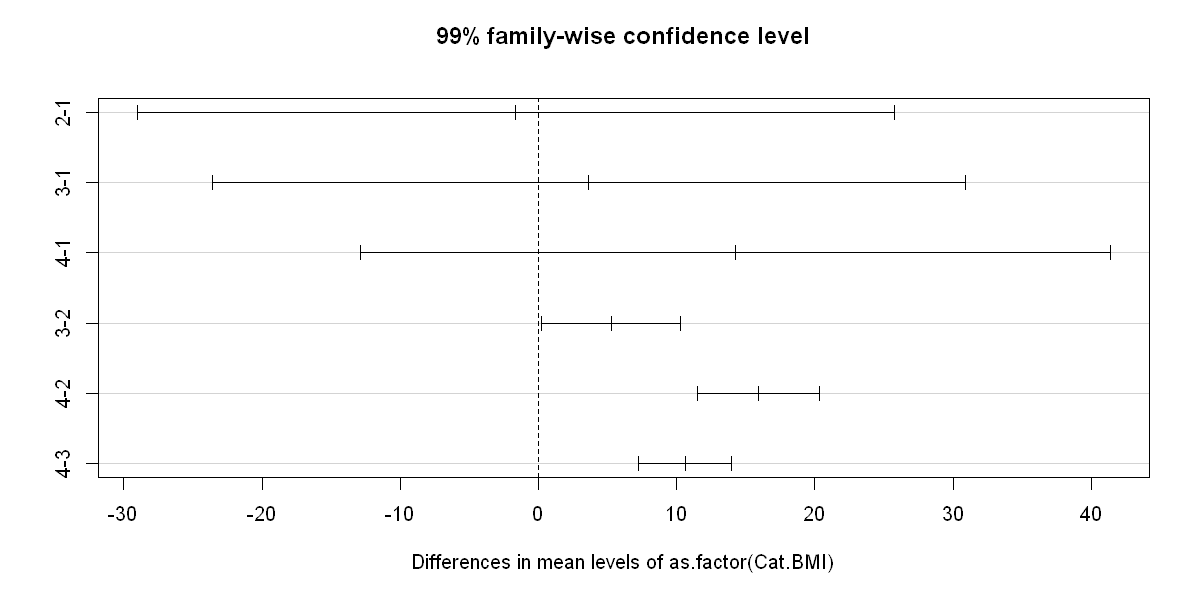

In [61]:
options(repr.plot.width = 10, repr.plot.height = 5)
plot(TukeyHSD(anova1, conf.level = 0.99))

<font size=3 color=green><b> Conclusão: a partir dos valores de F e de p-value apresentados pelo teste ANOVA rejeita-se $H_0$ </b> </font>
<br>
<p>
A partir do gráfico, é possível observar que há diferença em três grupos.
</p>
<hr>

<font size=4 color=green> <b>Kruskal-Wallis</b> </font>

In [62]:
kruskal.test(SkinThickness ~ Cat.BMI, data=dados_limpos)


	Kruskal-Wallis rank sum test

data:  SkinThickness by Cat.BMI
Kruskal-Wallis chi-squared = 132.38, df = 3, p-value <
0.00000000000000022


In [63]:
pchisq(132.38, df = 3, lower.tail=F)

[1] 0.0000000000000000000000000001660136

In [64]:
qchisq(0.99, df = 3)
qchisq(0.01, df=3)

[1] 11.34487

[1] 0.1148318

In [65]:
dunn_test(SkinThickness ~ Cat.BMI, data=dados_limpos, p.adjust.method='bonferroni')

,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,SkinThickness,1,2,1,44,-0.1186659,0.905540039465667079277011453,1.00000000000000000000000000,ns
2,SkinThickness,1,3,1,85,0.3878524,0.698125260075918463442690154,1.00000000000000000000000000,ns
3,SkinThickness,1,4,1,262,1.4101849,0.158485086888866144594345542,0.95091052133319686756607325,ns
4,SkinThickness,2,3,44,85,2.7467887,0.006018189708945990631927536,0.03610913825367594032211827,*
5,SkinThickness,2,4,44,262,9.4085898,0.000000000000000000005028379,0.00000000000000000003017027,****
6,SkinThickness,3,4,85,262,8.1933838,0.000000000000000253982563275,0.00000000000000152389537965,****


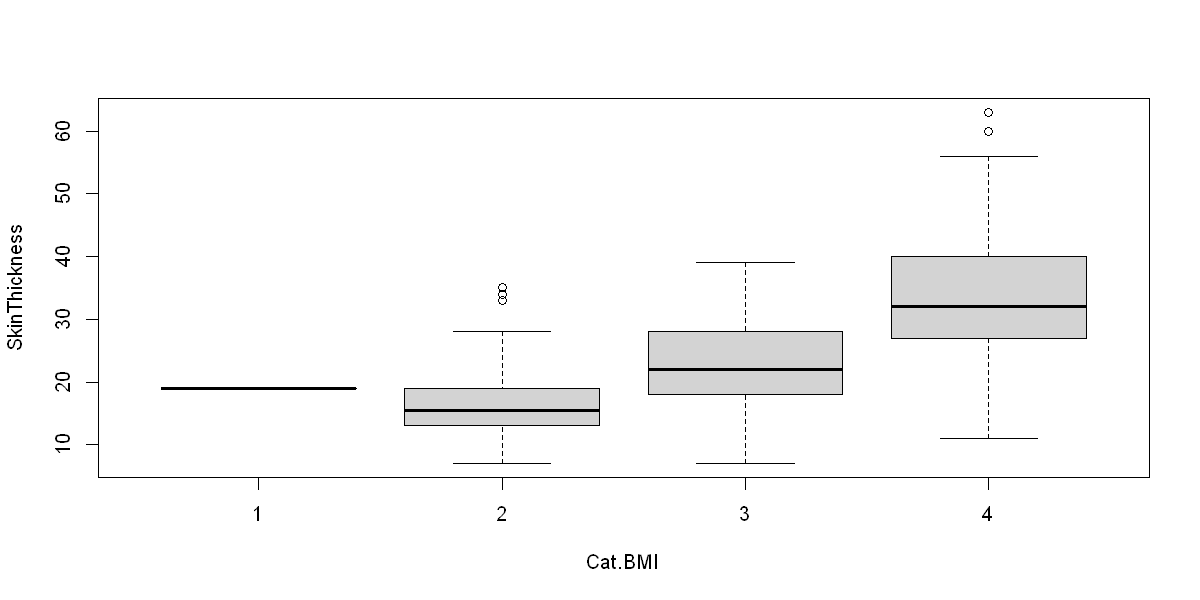

In [66]:
boxplot(SkinThickness ~ Cat.BMI, data=dados_limpos)

<font size=3 color=green><b> Conclusão: a partir dos valores de F e de p-value apresentados pelo teste de Kruskal-Wallis rejeita-se $H_0$ assim como identificado no teste ANOVA </b> </font>
<hr>

<font color=green size=5> <b>5 - Regressão linear simples</b> </font> 

In [67]:
cor(dados_limpos[c('Pregnancies', 'SkinThickness', 'BMI', 'Outcome')], method="spearman")

,Pregnancies,SkinThickness,BMI,Outcome
Pregnancies,1.00000000,0.05475868,-0.06555144,0.2002345
SkinThickness,0.05475868,1.00000000,0.67439293,0.2601534
BMI,-0.06555144,0.67439293,1.00000000,0.2670772
Outcome,0.20023445,0.26015343,0.26707717,1.0000000


In [68]:
cor.test(dados_limpos$SkinThickness, dados_limpos$BMI, method="spearman", conf.level = 0.99)

Warning message in cor.test.default(dados_limpos$SkinThickness, dados_limpos$BMI, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  dados_limpos$SkinThickness and dados_limpos$BMI
S = 3268872, p-value < 0.00000000000000022
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6743929 


`geom_smooth()` using formula 'y ~ x'



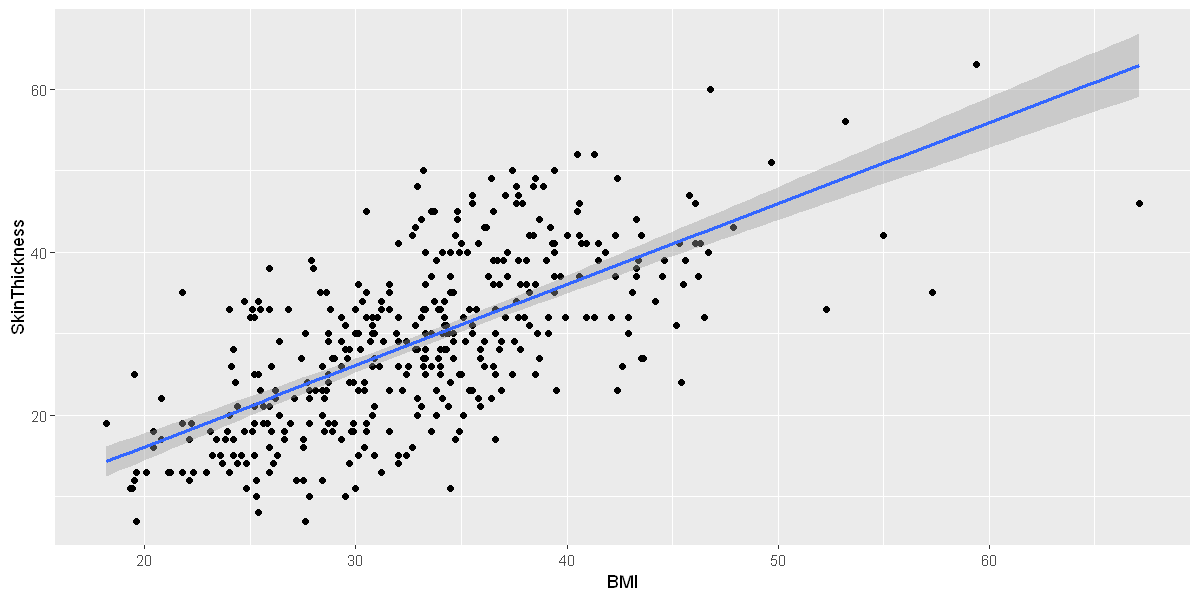

In [69]:
ggplot(data = dados_limpos, aes(x = BMI, y = SkinThickness))+
  geom_point() + 
  geom_smooth(method = "lm")

In [70]:
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 4.1.2"
corrplot 0.92 loaded



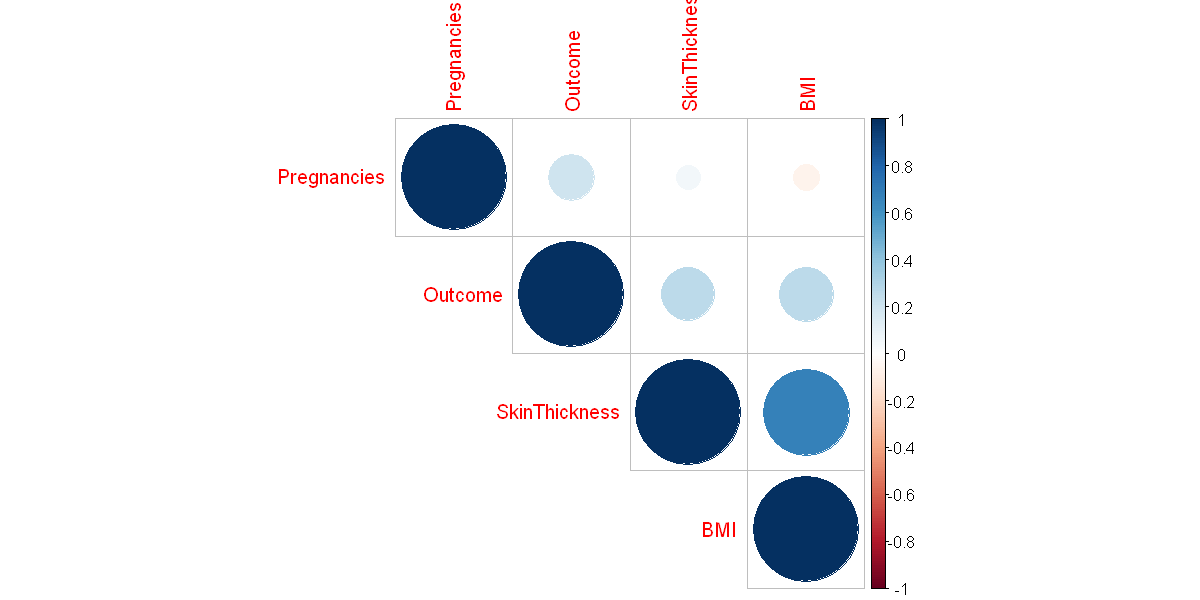

In [71]:
matriz<-cor(dados_limpos[c('Pregnancies', 'SkinThickness', 'BMI', 'Outcome')], method="spearman")
corrplot(matriz, type="upper", order="hclust")

In [72]:
cor(dados_limpos$SkinThickness, dados_limpos$BMI, method="spearman")

[1] 0.6743929

In [73]:
modelo <- lm(BMI ~ SkinThickness, dados_limpos)

In [74]:
modelo$coefficients

(Intercept) SkinThickness 
   20.1468622     0.4439589

In [75]:
summary(modelo)


Call:
lm(formula = BMI ~ SkinThickness, data = dados_limpos)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8854  -3.4134  -0.3332   3.3009  26.5310 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   20.14686    0.78353   25.71 <0.0000000000000002 ***
SkinThickness  0.44396    0.02529   17.55 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.259 on 390 degrees of freedom
Multiple R-squared:  0.4414,	Adjusted R-squared:  0.4399 
F-statistic: 308.1 on 1 and 390 DF,  p-value: < 0.00000000000000022


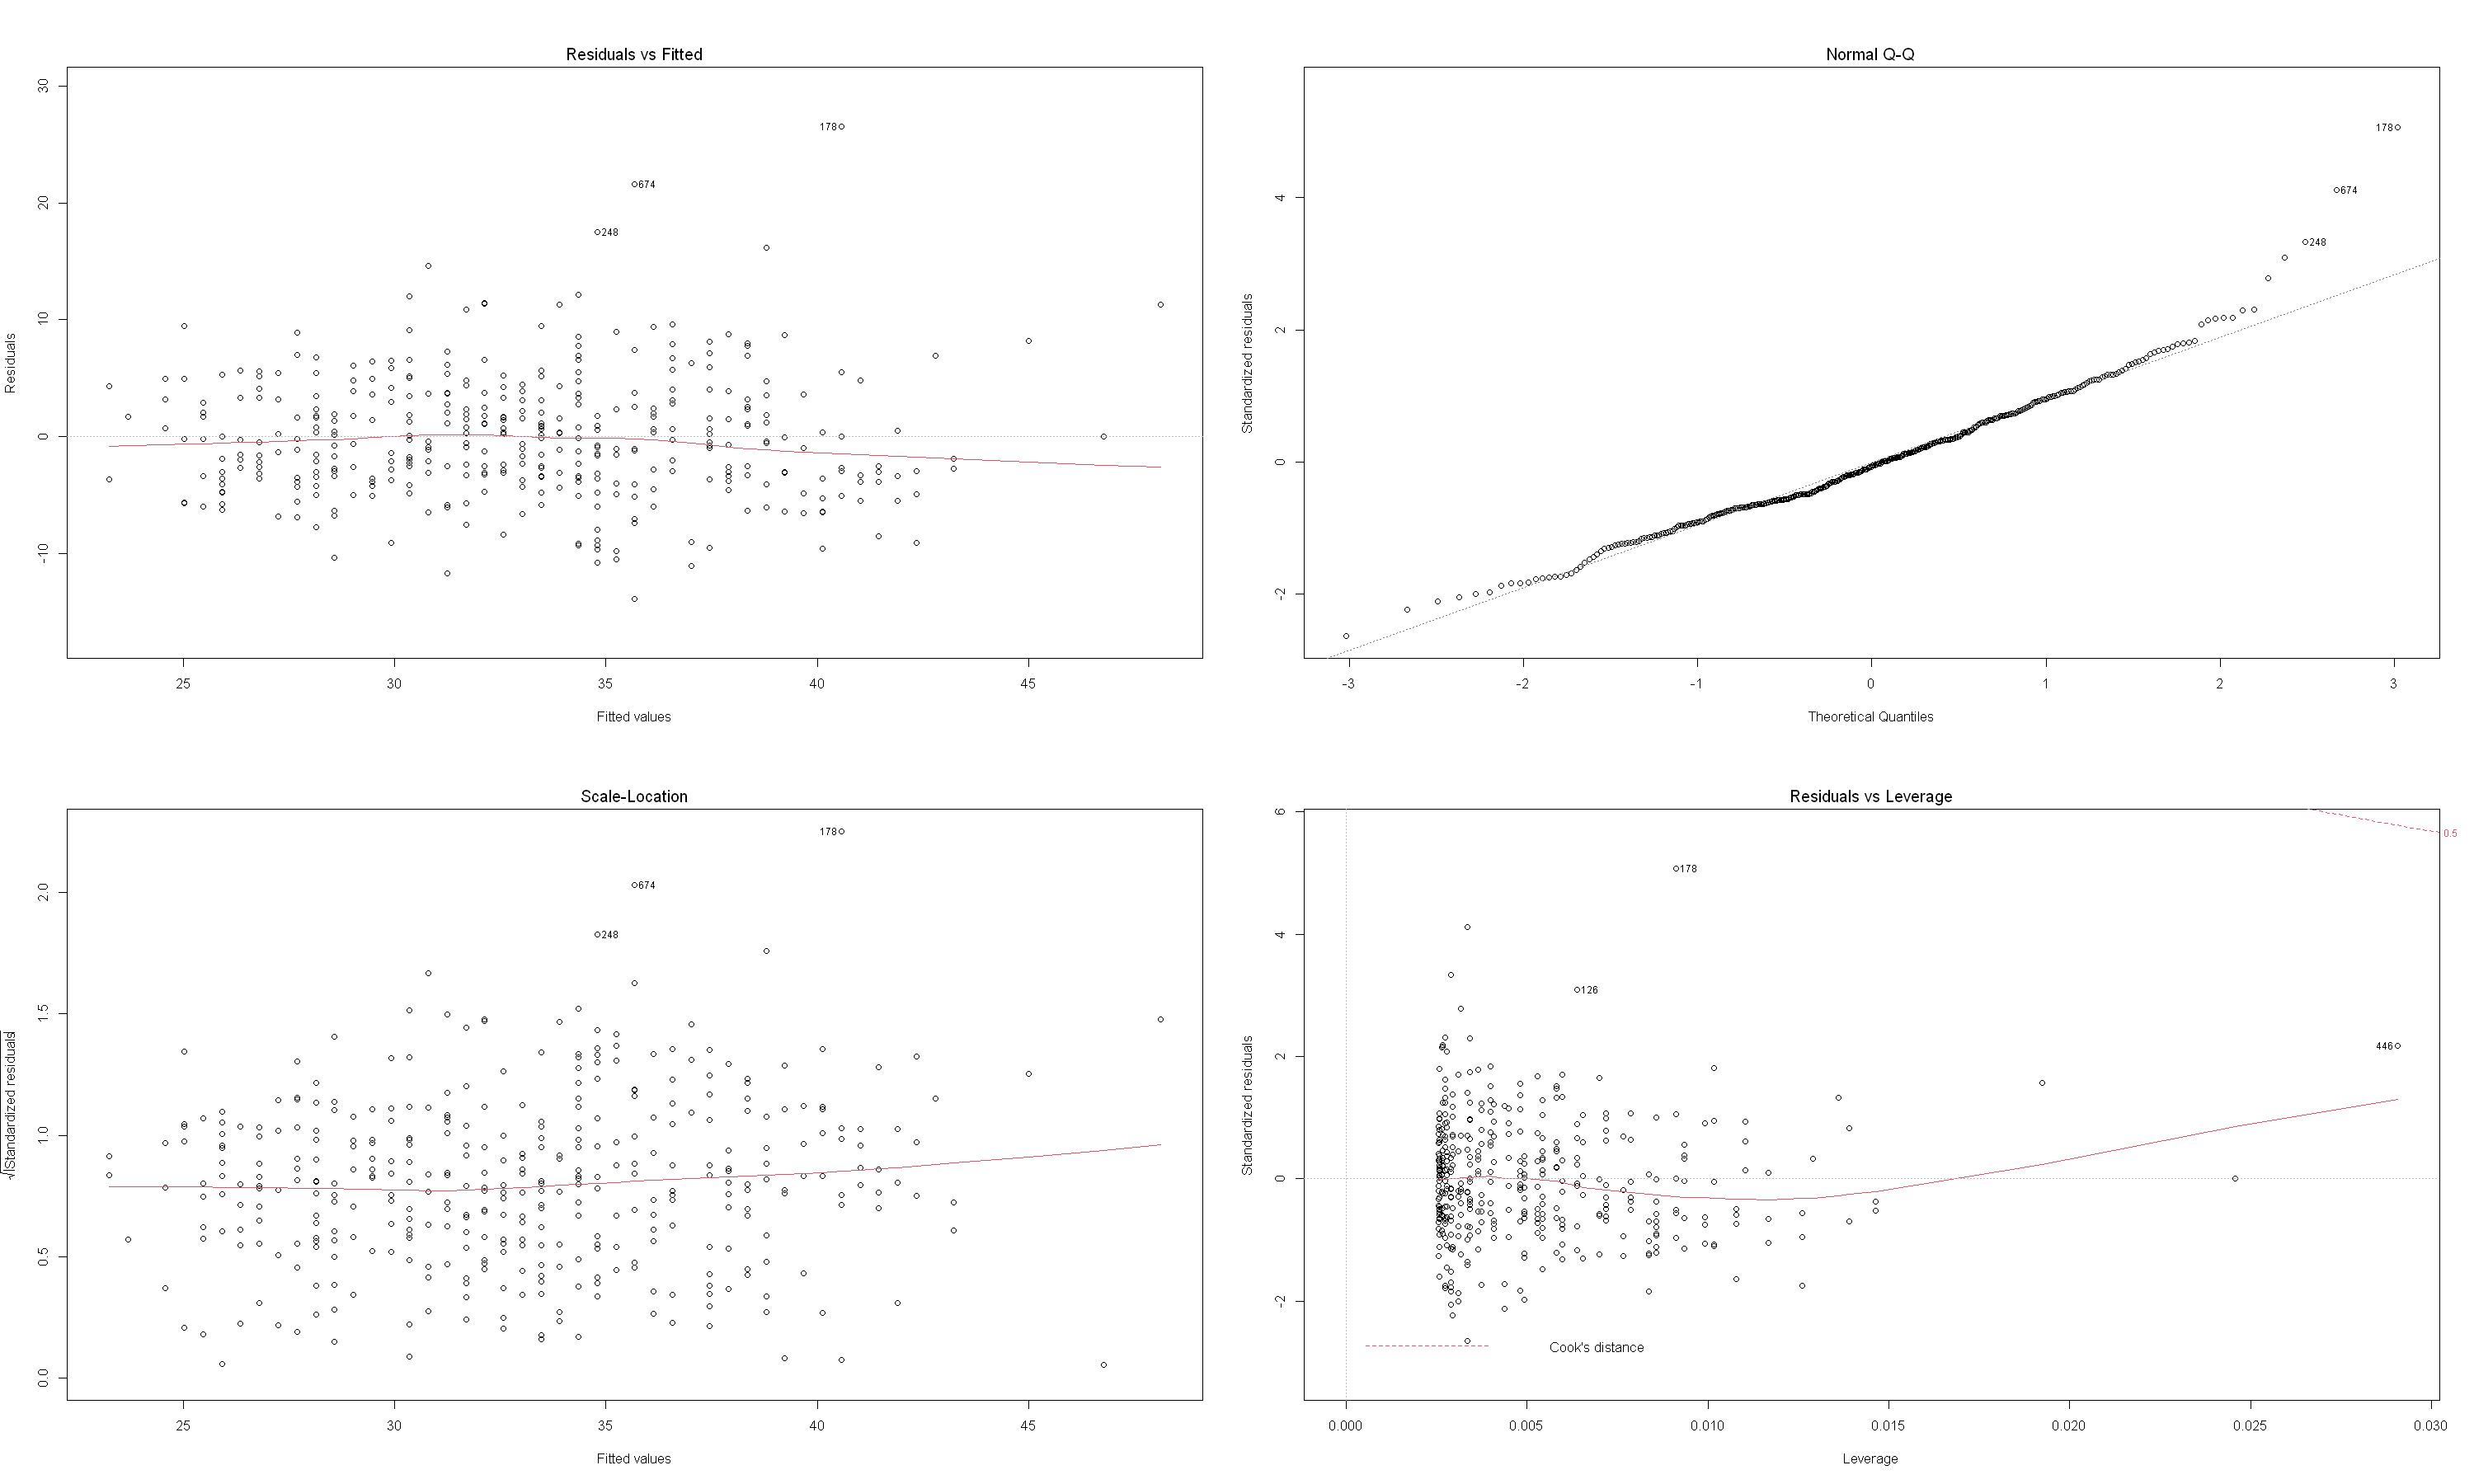

In [76]:
par(mfrow=c(2,2))
options(repr.plot.width = 25, repr.plot.height = 15)
plot(modelo)

In [77]:
par(mfrow=c(1,1))

#### Normalidade dos resíduos

In [78]:
llt <- lillie.test(modelo$residuals)
llt


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  modelo$residuals
D = 0.050028, p-value = 0.01982


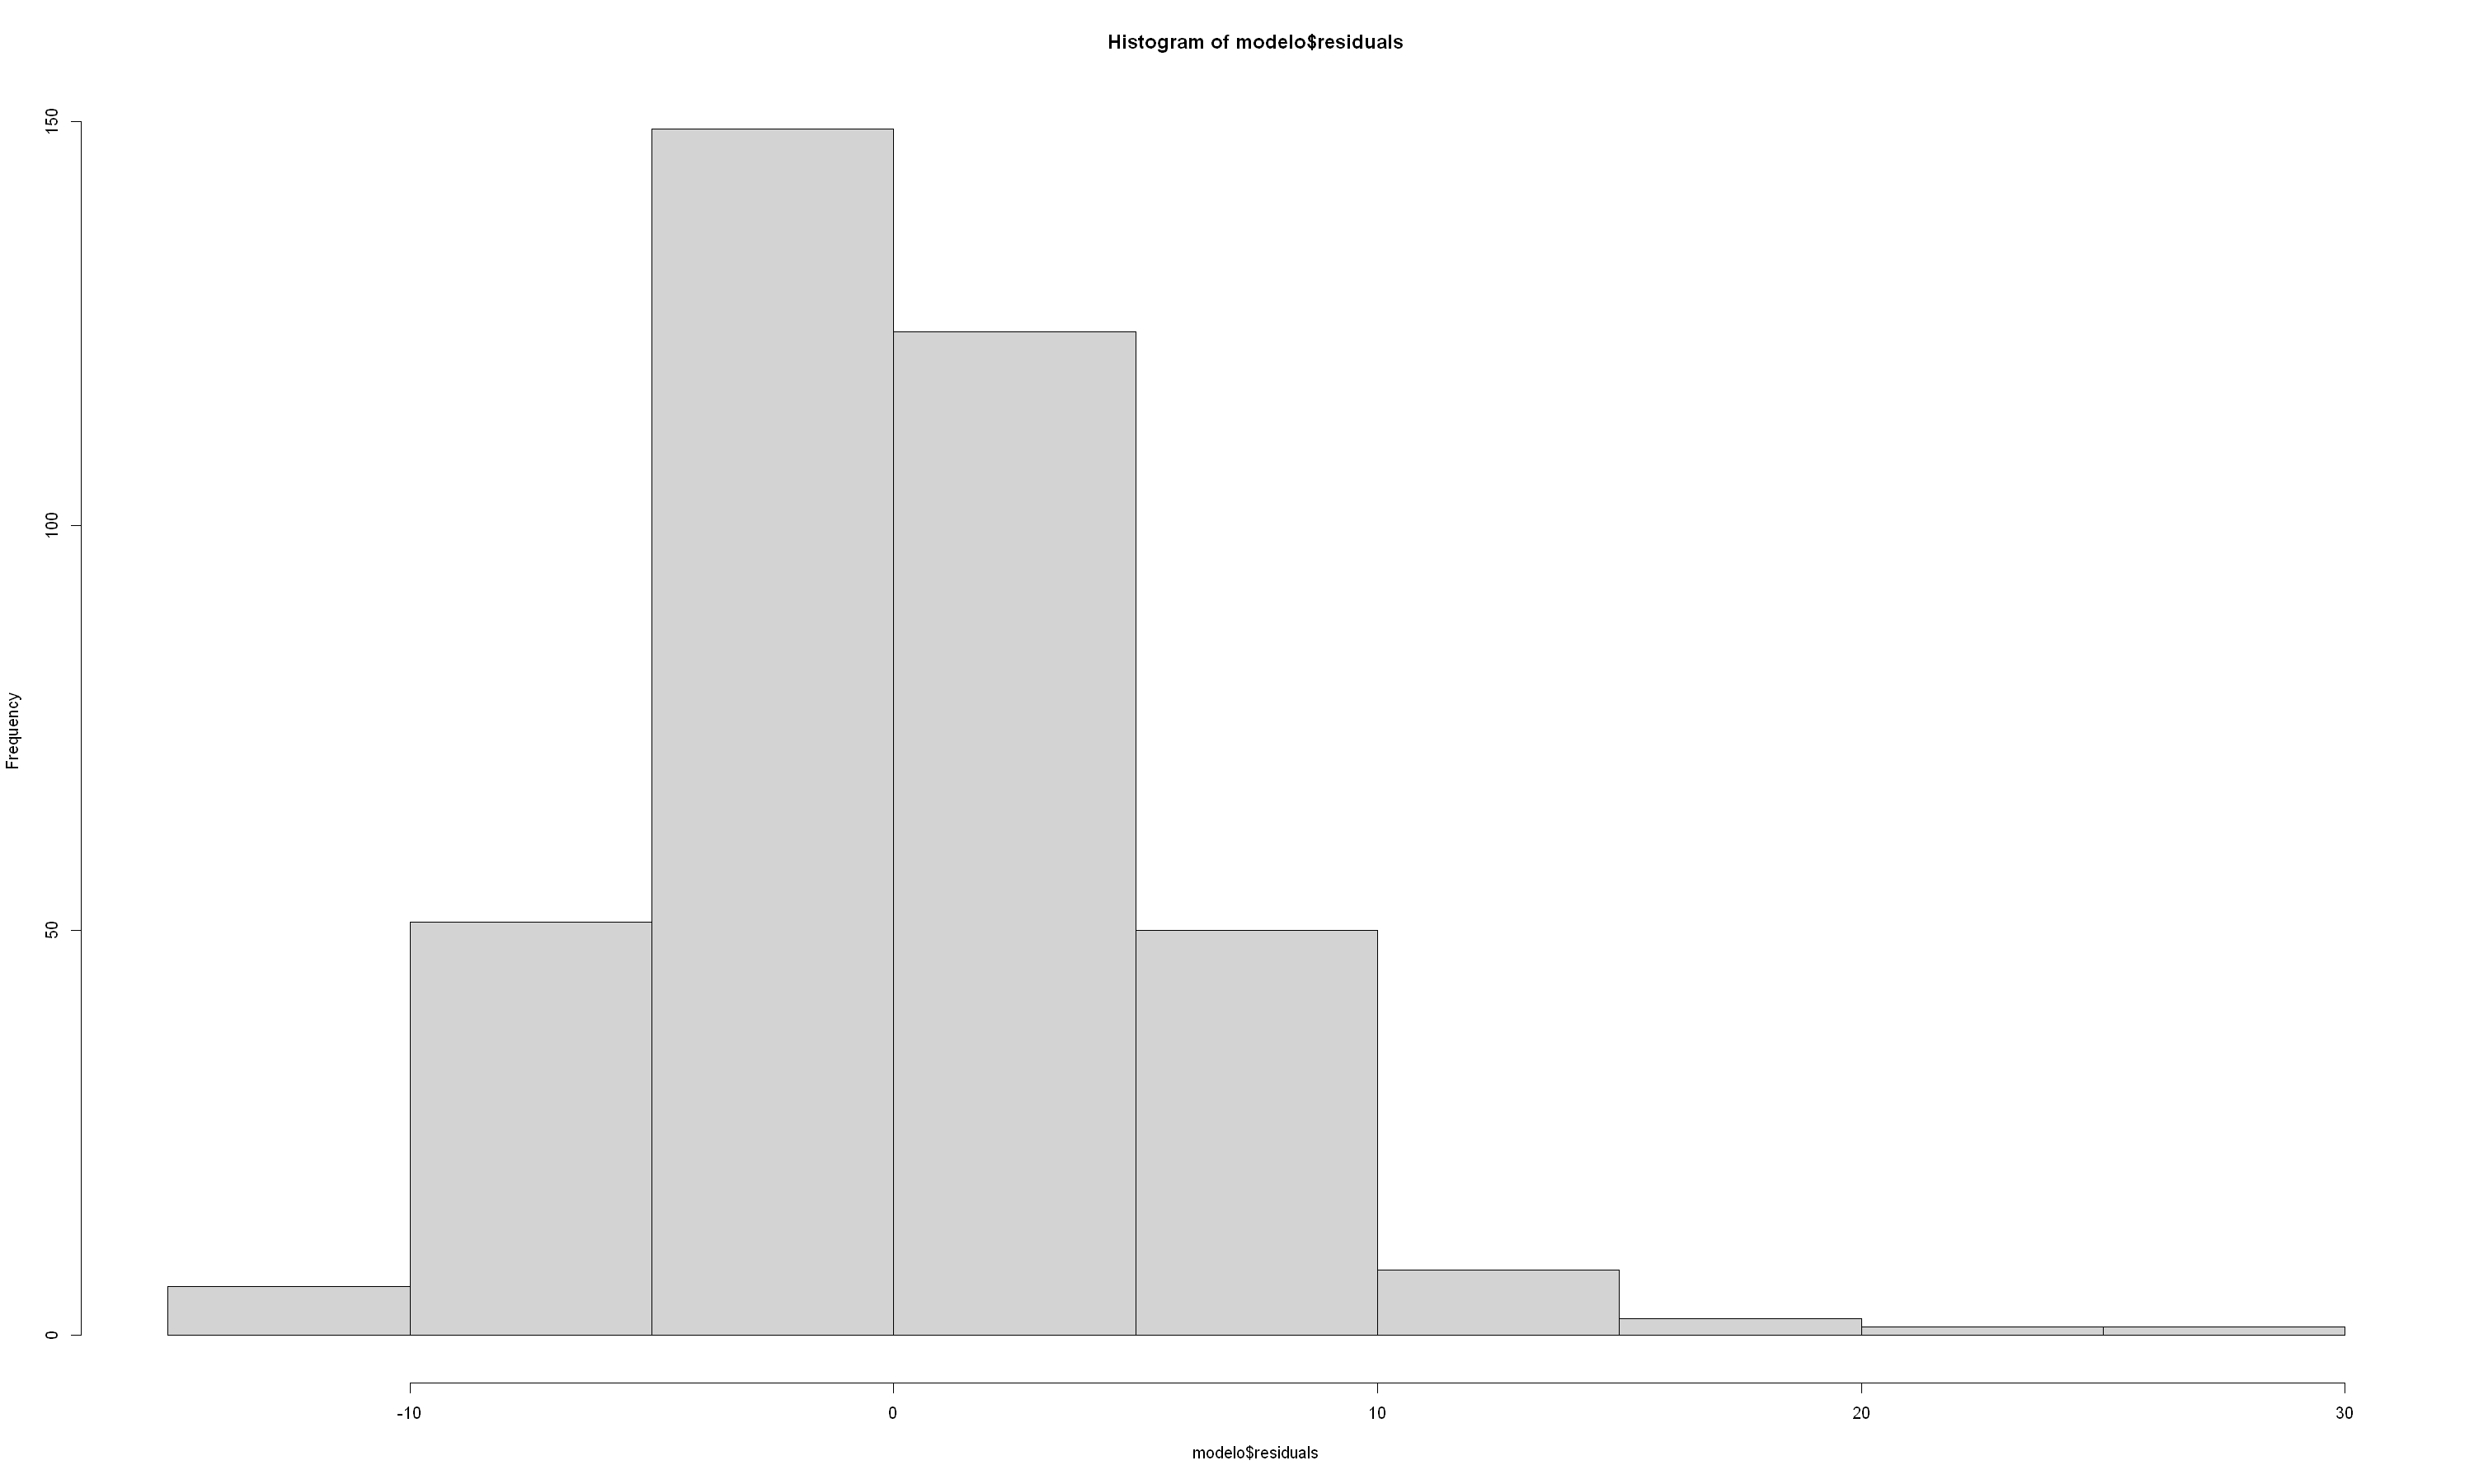

In [79]:
hist(modelo$residuals)

In [80]:
llt$p.value > 0.01

[1] TRUE

Não normais

In [81]:
library(lmtest)

In [82]:
gqtest(modelo, order.by=~SkinThickness, data=dados_limpos)


	Goldfeld-Quandt test

data:  modelo
GQ = 1.751, df1 = 194, df2 = 194, p-value = 0.00005411
alternative hypothesis: variance increases from segment 1 to 2


In [83]:
dados_limpos$predicted <- predict(modelo)
dados_limpos$residuals <- residuals(modelo)

`geom_smooth()` using formula 'y ~ x'



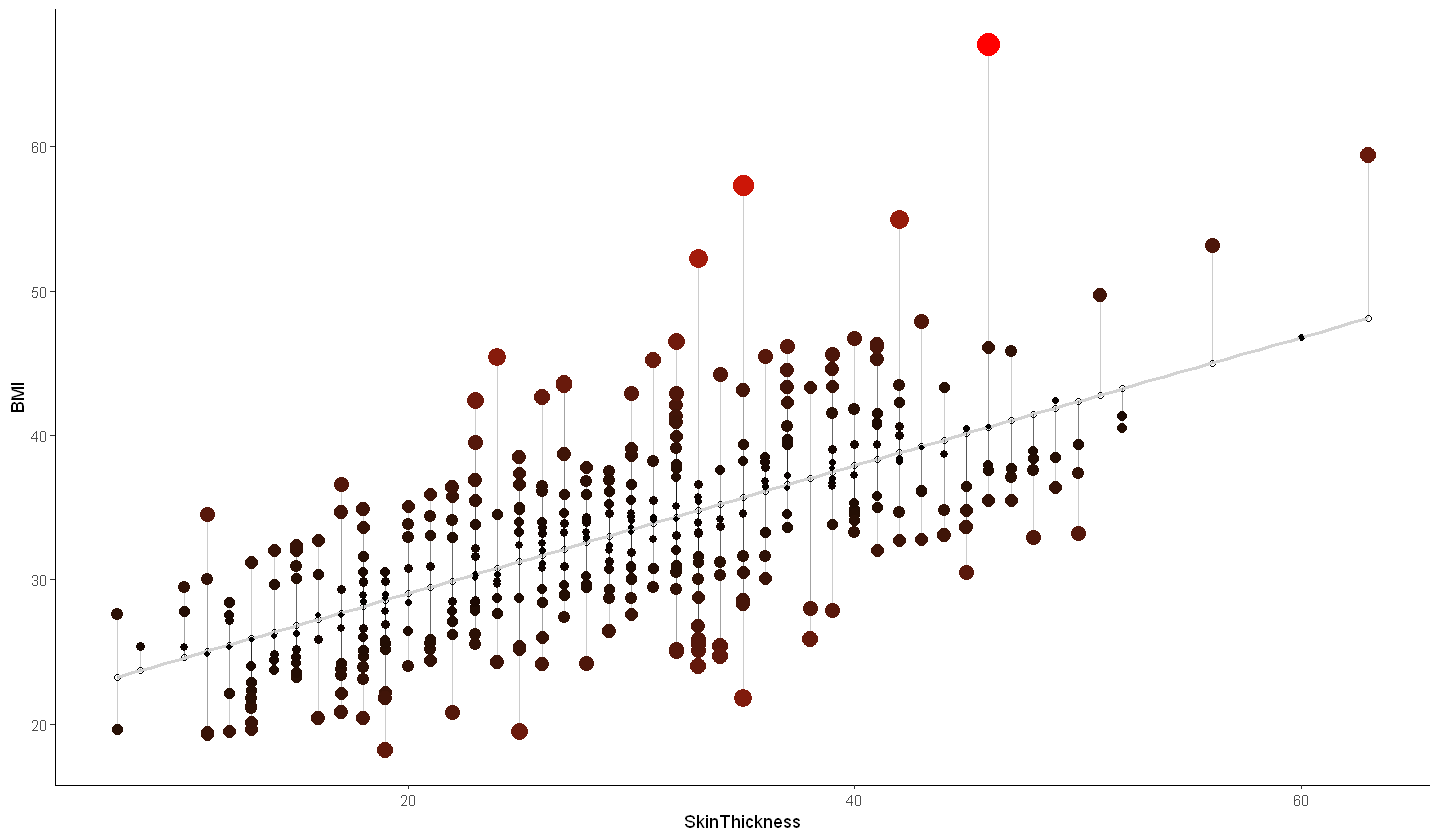

In [84]:
options(repr.plot.width = 12, repr.plot.height = 7)
ggplot(dados_limpos, aes(x = SkinThickness, y=BMI))+
geom_point(aes(y=predicted), shape=1)+
geom_smooth(method="lm", se=FALSE, color="lightgrey")+
geom_segment(aes(xend=SkinThickness, yend=predicted), alpha = 0.2)+
geom_point(aes(color = abs(residuals), size=abs(residuals)))+
scale_colour_continuous(low="black", high="red")+
guides(color="none", size="none")+
theme_classic()

In [85]:
modelo_multi <- lm(BMI ~ SkinThickness + Glucose, dados_limpos)
summary(modelo_multi)


Call:
lm(formula = BMI ~ SkinThickness + Glucose, data = dados_limpos)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.426  -3.471  -0.324   3.194  26.595 

Coefficients:
               Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   18.208473   1.209930  15.049 <0.0000000000000002 ***
SkinThickness  0.433249   0.025695  16.861 <0.0000000000000002 ***
Glucose        0.018353   0.008756   2.096              0.0367 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.237 on 389 degrees of freedom
Multiple R-squared:  0.4476,	Adjusted R-squared:  0.4448 
F-statistic: 157.6 on 2 and 389 DF,  p-value: < 0.00000000000000022


In [86]:
llt <- lillie.test(modelo_multi$residuals)
llt


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  modelo_multi$residuals
D = 0.050473, p-value = 0.018


In [87]:
gqtest(modelo_multi, order.by=~SkinThickness, data=dados_limpos)


	Goldfeld-Quandt test

data:  modelo_multi
GQ = 1.8288, df1 = 193, df2 = 193, p-value = 0.00001616
alternative hypothesis: variance increases from segment 1 to 2


In [88]:
modelo_log <- lm(log10(BMI) ~ log10(SkinThickness), dados_limpos)
summary(modelo_log)


Call:
lm(formula = log10(BMI) ~ log10(SkinThickness), data = dados_limpos)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.210899 -0.044272  0.000699  0.046179  0.235471 

Coefficients:
                     Estimate Std. Error t value            Pr(>|t|)    
(Intercept)           1.00432    0.02856   35.16 <0.0000000000000002 ***
log10(SkinThickness)  0.35299    0.01979   17.83 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06829 on 390 degrees of freedom
Multiple R-squared:  0.4492,	Adjusted R-squared:  0.4478 
F-statistic:   318 on 1 and 390 DF,  p-value: < 0.00000000000000022


In [89]:
llt2 <- lillie.test(modelo_log$residuals)
llt2


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  modelo_log$residuals
D = 0.029563, p-value = 0.5548


In [90]:
llt2$p.value > 0.01

[1] TRUE

Normais

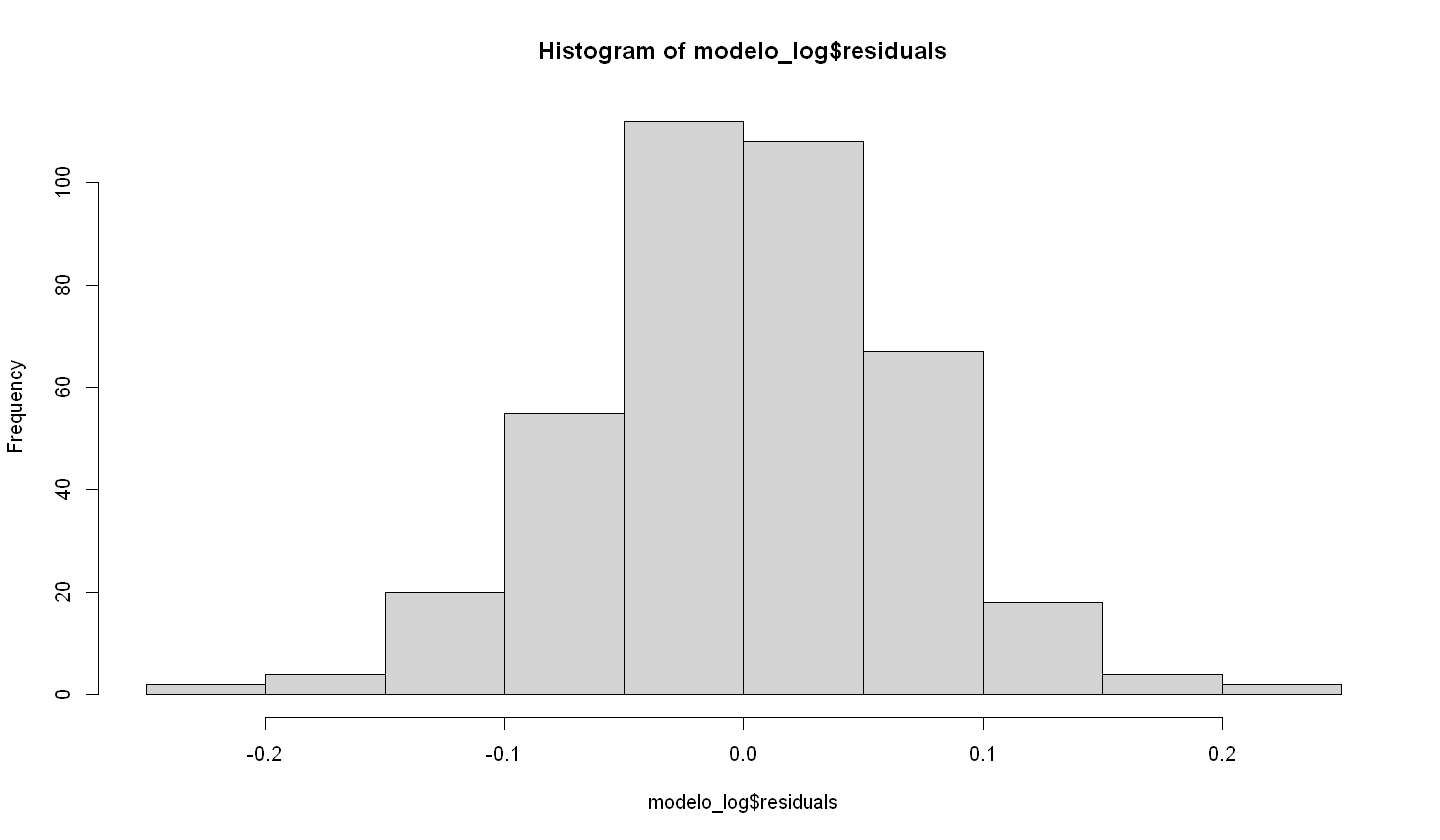

In [91]:
hist(modelo_log$residuals)

In [92]:
gqtest(modelo_log, order.by=~SkinThickness, data=dados_limpos)


	Goldfeld-Quandt test

data:  modelo_log
GQ = 1.0203, df1 = 194, df2 = 194, p-value = 0.4445
alternative hypothesis: variance increases from segment 1 to 2
